In [4]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

import tensorflow as tf

plt.rcParams["figure.figsize"] = (10, 6)

import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")

print("TensorFlow version: ", tf.__version__)

TensorFlow version:  2.19.0


In [36]:
gene = pd.read_csv("gene_expression.csv")
df.head

<bound method NDFrame.head of       Gene One  Gene Two  Cancer Present
0          4.3       3.9               1
1          2.5       6.3               0
2          5.7       3.9               1
3          6.1       6.2               0
4          7.4       3.4               1
...        ...       ...             ...
2995       5.0       6.5               1
2996       3.4       6.6               0
2997       2.7       6.5               0
2998       3.3       5.6               0
2999       4.6       8.2               0

[3000 rows x 3 columns]>

In [37]:
df = pd.DataFrame(gene, columns=["Gene One", "Gene Two", "Cancer Present"])

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gene One,3000.0,5.600133,1.828388,1.0,4.3,5.6,6.9,10.0
Gene Two,3000.0,5.410467,1.729081,1.0,4.0,5.4,6.7,10.0
Cancer Present,3000.0,0.500000,0.500083,0.0,0.0,0.5,1.0,1.0


In [39]:
df["Cancer Present"].value_counts()

Cancer Present
1    1500
0    1500
Name: count, dtype: int64

<Axes: xlabel='Gene One', ylabel='Gene Two'>

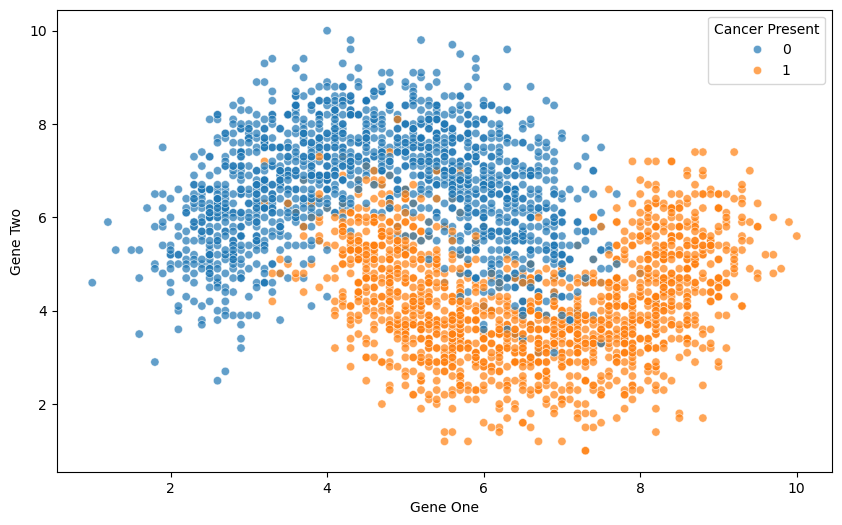

In [40]:
sns.scatterplot(x="Gene One", y="Gene Two", data=df, hue="Cancer Present", alpha=0.7)

(4.0, 8.0)

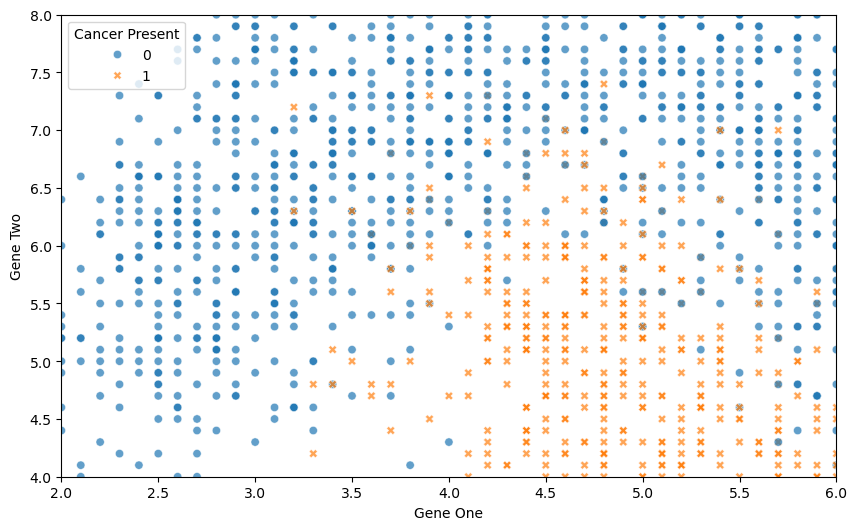

In [41]:
sns.scatterplot(x="Gene One", y="Gene Two", data=df, hue="Cancer Present", alpha=0.7, style= "Cancer Present")
plt.xlim(2, 6)
plt.ylim(4, 8)

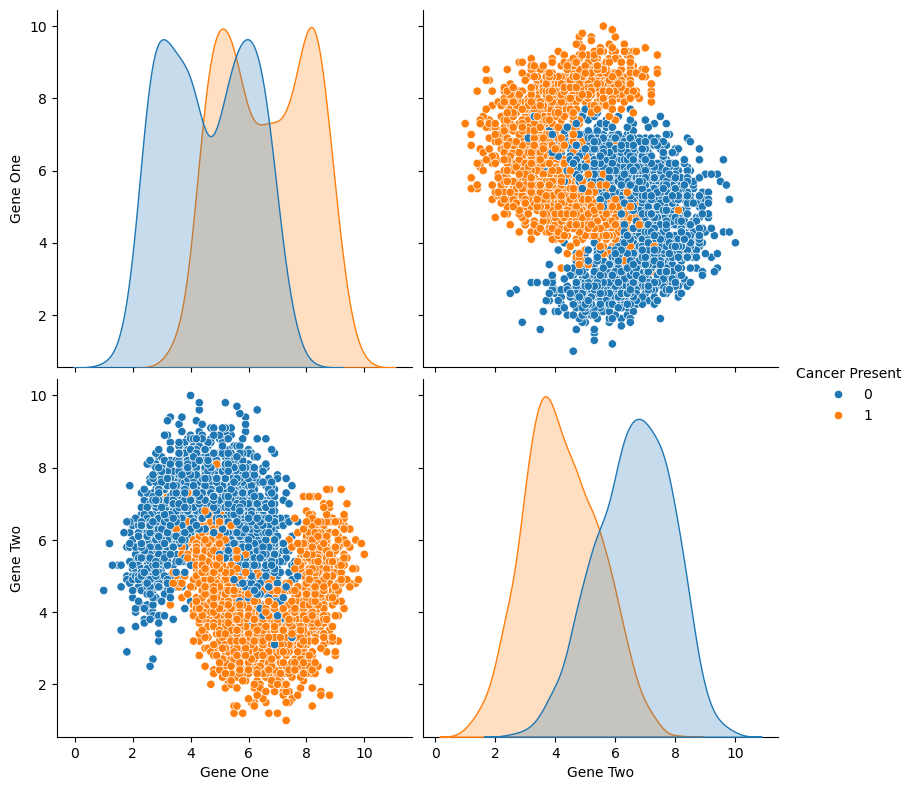

In [42]:
sns.pairplot(df, hue="Cancer Present", height=4, aspect=1)

<Axes: xlabel='Cancer Present', ylabel='Gene One'>

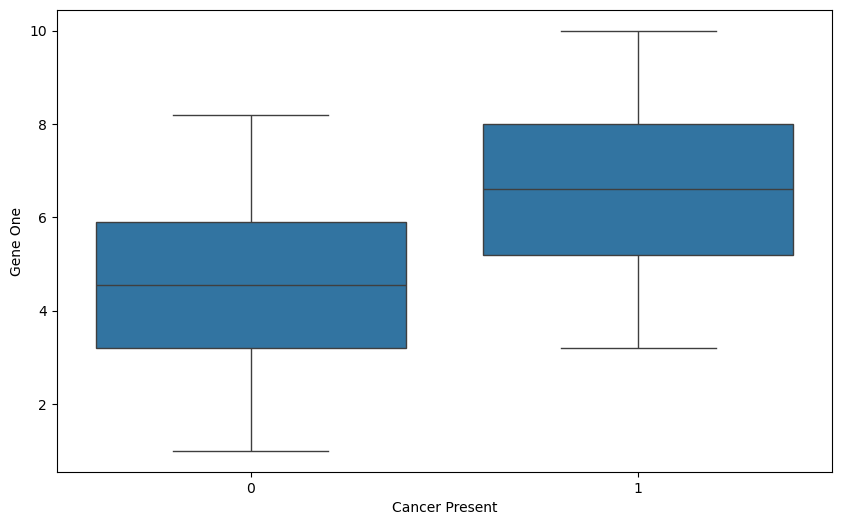

In [43]:
sns.boxplot(x="Cancer Present", y="Gene One", data=df)

<Axes: xlabel='Cancer Present', ylabel='Gene Two'>

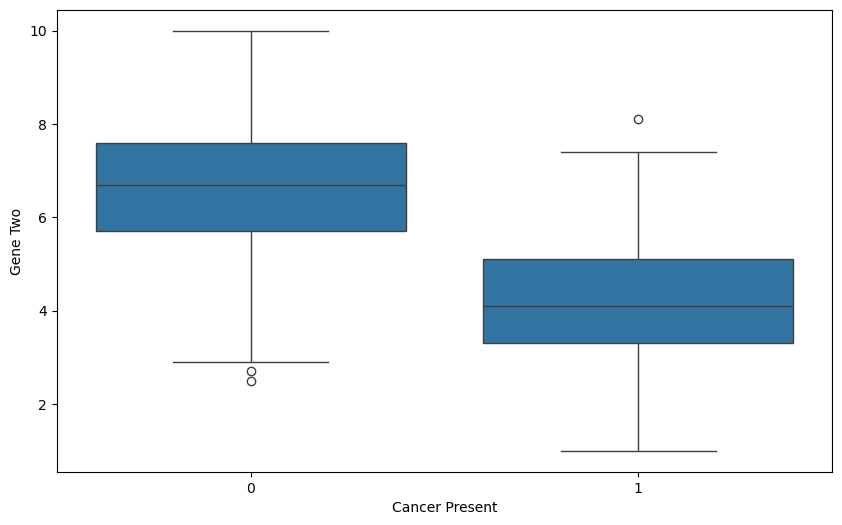

In [44]:
sns.boxplot(x="Cancer Present", y="Gene Two", data=df)

In [45]:
print(df['Cancer Present'].isnull().sum())  # Should be 0

0


In [46]:
df['Cancer Present'].fillna(df['Cancer Present'].mode()[0], inplace=True)

In [47]:
le = LabelEncoder()
df['Gene One'] = le.fit_transform(df['Gene One'])
df['Gene Two'] = le.fit_transform(df['Gene Two'])

In [48]:
#splitting test train prep
x = df[['Gene One', 'Gene Two']]
y = df['Cancer Present']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [50]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

#train and evaluate
results = []
for name, model in models.items():
    model.fit(x_train, y_train) #train
    y_pred = model.predict(x_test) #predict
    acc = accuracy_score(y_test, y_pred) #accuracy
    f1 = f1_score(y_test, y_pred, average='weighted') #f1 score
    cm = confusion_matrix(y_test, y_pred) #confusion matrix
    results.append([name, acc, f1, cm])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score", "Confusion Matrix"])
results_df = results_df.sort_values("Accuracy", ascending=False)

#show results
print(results_df)

                    Model  Accuracy  F1 Score        Confusion Matrix
2  Support Vector Machine  0.945000  0.944953  [[314, 14], [19, 253]]
5                     KNN  0.918333  0.918320  [[304, 24], [25, 247]]
1           Random Forest  0.901667  0.901651  [[299, 29], [30, 242]]
4           Decision Tree  0.895000  0.894782  [[302, 26], [37, 235]]
0     Logistic Regression  0.848333  0.848570  [[276, 52], [39, 233]]
3             Naive Bayes  0.845000  0.845242  [[275, 53], [40, 232]]


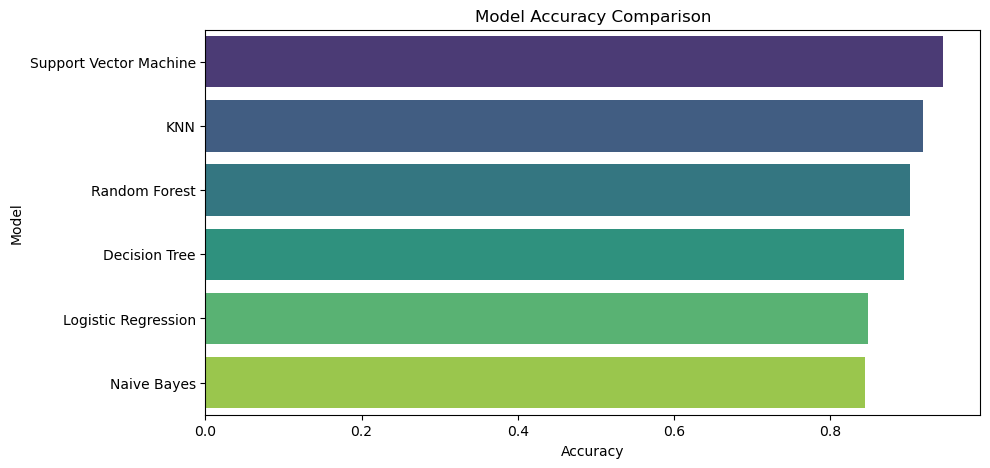

In [51]:
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df["Accuracy"], y=results_df["Model"], palette="viridis")
plt.xlabel("Accuracy")
plt.ylabel("Model") 
plt.title("Model Accuracy Comparison")
plt.show()


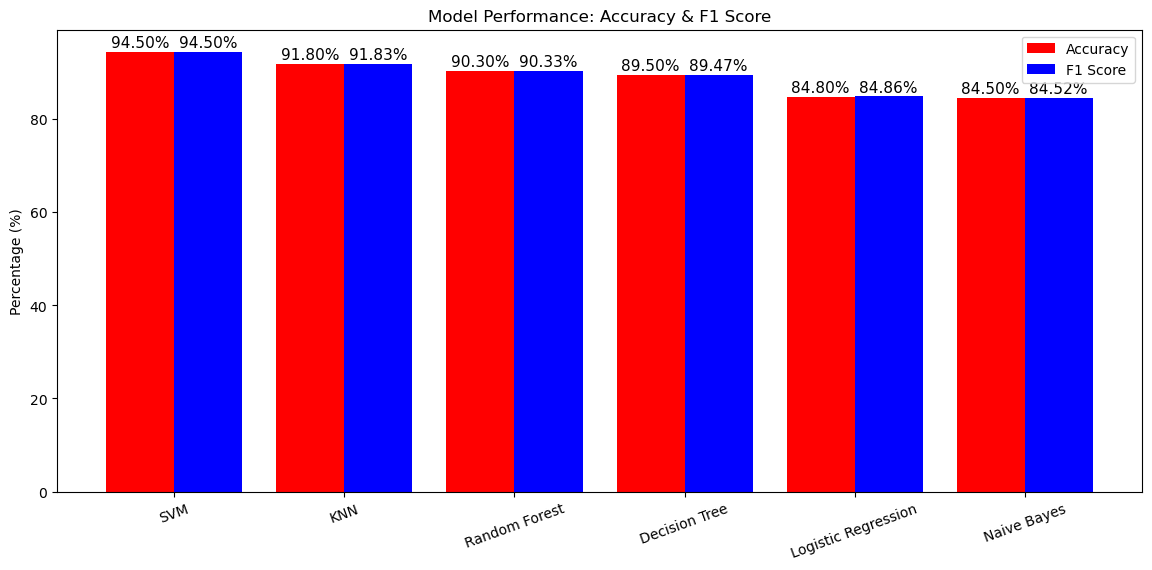

In [55]:
models = ["SVM", "KNN", "Random Forest", "Decision Tree", "Logistic Regression", "Naive Bayes"]
accuracy = [0.945, 0.918, 0.903, 0.895, 0.848, 0.845]
f1_scores = [0.944953, 0.918320, 0.903333, 0.894735, 0.848570, 0.845242]

x = np.arange(len(models))  # X-axis positions

# Plot
fig, ax = plt.subplots(figsize=(14, 6))
bar_width = 0.4

bars1 = ax.bar(x - bar_width/2, np.array(accuracy) * 100, bar_width, label="Accuracy", color="red")
bars2 = ax.bar(x + bar_width/2, np.array(f1_scores) * 100, bar_width, label="F1 Score", color="blue")

# Add percentage labels
for bar in bars1:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f"{bar.get_height():.2f}%", ha="center", fontsize=11, color="black")
for bar in bars2:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f"{bar.get_height():.2f}%", ha="center", fontsize=11, color="black")

# Labels & Titles
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=20)
ax.set_ylabel("Percentage (%)")
ax.set_title("Model Performance: Accuracy & F1 Score")
ax.legend()

plt.show()

In [6]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [9]:
predictions = model(x_train[:1]).numpy()
predictions


array([[-0.5771706 , -0.10076679,  0.7696722 ,  0.15942508, -0.53582543,
        -0.29092306, -0.16675802,  0.7805017 ,  0.61624765,  0.17913982]],
      dtype=float32)

In [10]:
tf.nn.softmax(predictions).numpy()


array([[0.04599541, 0.07406517, 0.17686461, 0.09607579, 0.04793696,
        0.06123932, 0.06933531, 0.17879038, 0.15170835, 0.09798869]],
      dtype=float32)

In [11]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


In [12]:
loss_fn(y_train[:1], predictions).numpy()


2.792966

In [13]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])


In [14]:
model.fit(x_train, y_train, epochs=100)


Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8627 - loss: 0.4706
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9542 - loss: 0.1566
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9690 - loss: 0.1040
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9731 - loss: 0.0884
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9783 - loss: 0.0685
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9795 - loss: 0.0632
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9808 - loss: 0.0592
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9837 - loss: 0.0505
Epoch 9/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9854 - loss: 0.0462
Epoch 10/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9863 - loss: 0.0422
Epoch 11/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9868 - loss: 0.0401
Epoch 12/100
1875/1

In [15]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])


In [16]:
probability_model(x_test[:5])


<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[8.7997025e-21, 1.2964015e-26, 1.5329828e-23, 1.7327638e-10,
        2.1704422e-34, 2.5165390e-18, 6.0549244e-32, 1.0000000e+00,
        1.6268270e-19, 3.5182588e-13],
       [1.4867172e-26, 1.2866818e-17, 1.0000000e+00, 9.8989473e-20,
        0.0000000e+00, 3.4433039e-22, 1.6067830e-18, 0.0000000e+00,
        2.5226080e-22, 0.0000000e+00],
       [8.7998601e-23, 1.0000000e+00, 1.0821168e-14, 1.7067600e-20,
        4.0664214e-15, 1.9923814e-16, 1.4592813e-17, 1.2172648e-10,
        8.3489944e-11, 7.7790857e-20],
       [1.0000000e+00, 8.7571621e-31, 7.9276329e-15, 1.9891657e-27,
        6.7409746e-20, 1.2905806e-16, 1.6740296e-12, 3.8069826e-17,
        8.5307228e-28, 7.3536793e-12],
       [1.6676544e-19, 1.8736841e-36, 2.0697076e-17, 1.1119454e-25,
        9.9961358e-01, 1.4989448e-22, 1.0549889e-23, 1.1020255e-07,
        1.2024188e-25, 3.8632459e-04]], dtype=float32)>